#

# Librerías y csv

In [2]:
# Tratamiento de datos
import numpy as np
import pandas as pd

# Gráficos
import matplotlib.pyplot as plt

# Preprocesado y modelado
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

datos = pd.read_csv("https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/Advertising_Web.csv")
datos

,Unnamed: 0,X,TV,Radio,Newspaper,Web,Sales
0,1,1,230.1,37.8,69.2,306.634752,22.1
1,2,2,44.5,39.3,45.1,302.653070,10.4
2,3,3,17.2,45.9,69.3,49.498908,9.3
3,4,4,151.5,41.3,58.5,257.816893,18.5
4,5,5,180.8,10.8,58.4,195.660076,12.9
...,...,...,...,...,...,...,...
195,196,196,38.2,3.7,13.8,248.841073,7.6
196,197,197,94.2,4.9,8.1,118.041856,9.7
197,198,198,177.0,9.3,6.4,213.274671,12.8
198,199,199,283.6,42.0,66.2,237.498063,25.5


# Explorar datos

In [5]:
print("Observaciones y variables: ", datos.shape)
print("Columnas y tipo de dato")

Observaciones y variables:  (200, 7)
Columnas y tipo de dato


In [6]:
print(datos.dtypes)

Unnamed: 0      int64
X               int64
TV            float64
Radio         float64
Newspaper     float64
Web           float64
Sales         float64
dtype: object


In [7]:
print(datos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   X           200 non-null    int64  
 2   TV          200 non-null    float64
 3   Radio       200 non-null    float64
 4   Newspaper   200 non-null    float64
 5   Web         200 non-null    float64
 6   Sales       200 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 11.1 KB
None


# Limpiar datos

In [8]:
datos = datos[['TV','Radio', 'Newspaper', 'Web', 'Sales']]
datos.describe()

,TV,Radio,Newspaper,Web,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,159.587355,14.022500
std,85.854236,14.846809,21.778621,76.815266,5.217457
min,0.700000,0.000000,0.300000,4.308085,1.600000
25%,74.375000,9.975000,12.750000,99.048767,10.375000
50%,149.750000,22.900000,25.750000,156.862154,12.900000
75%,218.825000,36.525000,45.100000,212.311848,17.400000
max,296.400000,49.600000,114.000000,358.247042,27.000000


In [9]:
datos

,TV,Radio,Newspaper,Web,Sales
0,230.1,37.8,69.2,306.634752,22.1
1,44.5,39.3,45.1,302.653070,10.4
2,17.2,45.9,69.3,49.498908,9.3
3,151.5,41.3,58.5,257.816893,18.5
4,180.8,10.8,58.4,195.660076,12.9
...,...,...,...,...,...
195,38.2,3.7,13.8,248.841073,7.6
196,94.2,4.9,8.1,118.041856,9.7
197,177.0,9.3,6.4,213.274671,12.8
198,283.6,42.0,66.2,237.498063,25.5


# Datos de entrenamiento y datos de validación

In [10]:
X_entrena, X_valida, Y_entrena, Y_valida = train_test_split(datos.drop(columns = "Sales"), datos['Sales'],train_size=.70,  random_state=1550)

## Datos de entrenamiento

In [13]:
print("Estructura de datos de entrenamiento... ", X_entrena.shape)
print(X_entrena)
print(X_entrena[['TV']], X_entrena[['Radio']], X_entrena[['Newspaper']], X_entrena[['Web']])

Estructura de datos de entrenamiento...  (140, 4)
        TV  Radio  Newspaper         Web
53   182.6   46.2       58.7  176.050052
145  140.3    1.9        9.0  231.883385
54   262.7   28.8       15.9  324.615179
90   134.3    4.9        9.3  258.355488
52   216.4   41.7       39.6  161.802512
..     ...    ...        ...         ...
15   195.4   47.7       52.9  148.095134
181  218.5    5.4       27.4  162.387486
137  273.7   28.9       59.7  288.260611
25   262.9    3.5       19.5  160.562859
74   213.4   24.6       13.1  156.284261

[140 rows x 4 columns]
        TV
53   182.6
145  140.3
54   262.7
90   134.3
52   216.4
..     ...
15   195.4
181  218.5
137  273.7
25   262.9
74   213.4

[140 rows x 1 columns]      Radio
53    46.2
145    1.9
54    28.8
90     4.9
52    41.7
..     ...
15    47.7
181    5.4
137   28.9
25     3.5
74    24.6

[140 rows x 1 columns]      Newspaper
53        58.7
145        9.0
54        15.9
90         9.3
52        39.6
..         ...
15        52.9
18

# Modelo de Árbol de Regresión

In [16]:
modelo_ar = DecisionTreeRegressor(max_depth = 3, random_state = 2022)
modelo_ar.fit(X_entrena, Y_entrena)

DecisionTreeRegressor(max_depth=3, random_state=2022)

## Visualización del modelo

Profundidad del árbol: 3


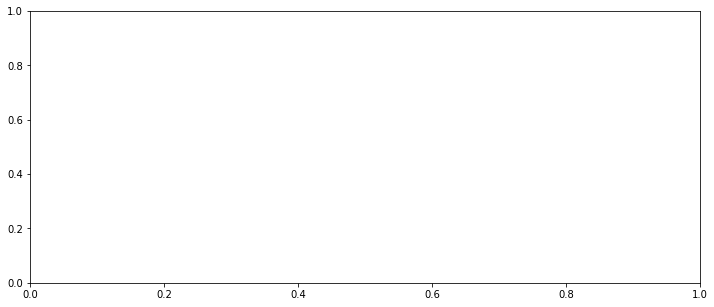

In [17]:
fig, ax = plt.subplots(figsize=(12, 5))

print(f"Profundidad del árbol: {modelo_ar.get_depth()}")

In [18]:
print(f"Número de nodos terminales: {modelo_ar.get_n_leaves()}")

Número de nodos terminales: 8


In [19]:
plot = plot_tree(
            decision_tree = modelo_ar,
            feature_names = datos.drop(columns = "Sales").columns,
            class_names   = 'Sales',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

plot

[Text(0.5, 0.875, 'TV <= 108.6\nsamples = 140\nvalue = 13.98'),
 Text(0.25, 0.625, 'TV <= 29.5\nsamples = 53\nvalue = 9.49'),
 Text(0.125, 0.375, 'TV <= 15.0\nsamples = 18\nvalue = 7.03'),
 Text(0.0625, 0.125, 'samples = 7\nvalue = 5.2'),
 Text(0.1875, 0.125, 'samples = 11\nvalue = 8.19'),
 Text(0.375, 0.375, 'Radio <= 27.1\nsamples = 35\nvalue = 10.76'),
 Text(0.3125, 0.125, 'samples = 23\nvalue = 9.95'),
 Text(0.4375, 0.125, 'samples = 12\nvalue = 12.32'),
 Text(0.75, 0.625, 'Radio <= 21.15\nsamples = 87\nvalue = 16.71'),
 Text(0.625, 0.375, 'Radio <= 9.7\nsamples = 41\nvalue = 13.29'),
 Text(0.5625, 0.125, 'samples = 21\nvalue = 11.77'),
 Text(0.6875, 0.125, 'samples = 20\nvalue = 14.88'),
 Text(0.875, 0.375, 'TV <= 215.9\nsamples = 46\nvalue = 19.75'),
 Text(0.8125, 0.125, 'samples = 25\nvalue = 17.88'),
 Text(0.9375, 0.125, 'samples = 21\nvalue = 21.98')]

In [20]:
texto_modelo = export_text(
                    decision_tree = modelo_ar,
                    feature_names = list(datos.drop(columns = "Sales").columns)
               )
print(texto_modelo)

|--- TV <= 108.60
|   |--- TV <= 29.50
|   |   |--- TV <= 15.00
|   |   |   |--- value: [5.20]
|   |   |--- TV >  15.00
|   |   |   |--- value: [8.19]
|   |--- TV >  29.50
|   |   |--- Radio <= 27.10
|   |   |   |--- value: [9.95]
|   |   |--- Radio >  27.10
|   |   |   |--- value: [12.32]
|--- TV >  108.60
|   |--- Radio <= 21.15
|   |   |--- Radio <= 9.70
|   |   |   |--- value: [11.77]
|   |   |--- Radio >  9.70
|   |   |   |--- value: [14.88]
|   |--- Radio >  21.15
|   |   |--- TV <= 215.90
|   |   |   |--- value: [17.88]
|   |   |--- TV >  215.90
|   |   |   |--- value: [21.98]



# Predicciones

## Evaluar predictores

In [21]:
importancia_predictores = pd.DataFrame(
                            {'predictor': datos.drop(columns = "Sales").columns,
                             'importancia': modelo_ar.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")

Importancia de los predictores en el modelo


In [22]:
importancia_predictores.sort_values('importancia', ascending=False)

,predictor,importancia
0,TV,0.667634
1,Radio,0.332366
2,Newspaper,0.000000
3,Web,0.000000


In [23]:
predicciones = modelo_ar.predict(X = X_valida)

## RMSE

In [24]:
rmse = mean_squared_error(
        y_true  = Y_valida,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 2.0855343724133126


In [25]:
print('Mean Squared Error: MSE', metrics.mean_squared_error(Y_valida, predicciones))

Mean Squared Error: MSE 4.349453618517389


In [26]:
print('Root Mean Squared Error RMSE:', np.sqrt(metrics.mean_squared_error(Y_valida, predicciones)))

Root Mean Squared Error RMSE: 2.0855343724133126


# Interpretación

### ¿Cuál es el contexto de los datos?


Una empresa necesita conocer la relación de sus ventas con la cantidad de dinero invertido en distintos medios.



### ¿Cuántas observaciones se analizan y cuáles son las variables de interés?



Se tiene un total de 200 observaciones. Las variables de interés son TV, Radio, Newspaper, Web y Sales.



### ¿Cuáles son las variables independientes y dependientes?

Las variables independientes son TV, Radio, Newspaper y Web, la variable dependiente es Sales.



### ¿Cuál es el porcentaje de datos de entrenamiento y datos de validación?

Se entrenará y validará con un 30% y 70% de los datos para el entrenamiento y la validación, respectivamente. La semilla a utilizar es 1550.



### ¿Cuál es el valor de RMSE y qué significaría este valor?

El valor RMSE es de aproximadamente 2.0855, el cual indica que según la predicción realizada, los datos variarán aproximadamente un 2.0855 puntos, respecto a la línea de predicción.

### ¿Puede haber otro modelo más óptimo para estos datos?

Sí, este bien podría ser una regresión lineal múltiple con más de una variable dependiente o más variables independientes.

### Comparado con el modelo elaborado en lenguaje R cual tiene menor rmse y qué significa?



El resultado en R me salió con un RMSE de ~1.6493, mientras que el de Python me resultó en ~2.0855, por lo que la predicción hecha en R es más confiable que la hecha en Python.